In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [61]:
covid_data = pd.read_csv('Project Proposal Data.csv')

In [62]:
covid_data

,country,population,gdp_capita,forecasted_weeks,known_cases,known_hcw,labstaff,beds_total,perc_availbeds,forecasted_cases,critical_cases,severe_cases,mild_cases,beds_peak,icubeds_peak,severebeds_peak,forecased_tests,forecasted_criticaltests,forecasted_mildtests,hcw_required
0,albania,2867000,5269,5,361,14907,653,8314,3.32%,572969,28648,85945,458376,8314,276,8038,561510,343782,217728,138805
1,austria,8883000,51462,4,13806,121892,2022,67511,3.32%,1771729,88586,265759,1417383,67511,2241,65270,1736294,1063037,673257,416566
2,belarus,9448000,6290,5,2226,150370,2150,103928,3.57%,1888152,94408,283223,1510521,103928,3710,100218,1850389,1132891,717498,453953
3,belgium,11538000,47519,4,28018,171045,2626,71536,3.32%,2291216,114561,343682,1832973,71536,2375,69161,2245392,1374730,870662,522623
4,bosniaherzegovina,3281000,6066,6,1004,28545,747,11484,3.32%,655769,32788,98365,524616,11484,381,11103,642654,393462,249192,155377
5,croatia,4052000,14910,5,1600,46637,922,22691,3.32%,808952,40448,121343,647161,22691,753,21938,792773,485371,307402,155377
6,cyprus,1207000,28159,5,633,9177,339,4104,3.57%,240969,12048,36145,192776,4104,147,3957,236150,144582,91568,46195
7,czechrepublic,10631000,23079,5,5952,139499,2420,69102,3.57%,2121329,106066,318199,1697063,69102,2467,66635,2078902,1272797,806105,522623
8,denmark,5840000,61350,4,6174,88517,1329,14660,2.38%,1163129,58156,174469,930503,14660,349,14311,1139866,697877,441989,215206
9,estonia,1313000,23266,5,1309,13063,299,6565,2.38%,262169,13108,39325,209736,6565,156,6409,256926,157302,99624,46195


In [63]:
#setting the index to country name
europe = covid_data.set_index('country')
europe

,population,gdp_capita,forecasted_weeks,known_cases,known_hcw,labstaff,beds_total,perc_availbeds,forecasted_cases,critical_cases,severe_cases,mild_cases,beds_peak,icubeds_peak,severebeds_peak,forecased_tests,forecasted_criticaltests,forecasted_mildtests,hcw_required
country,,,,,,,,,,,,,,,,,,,
albania,2867000,5269,5,361,14907,653,8314,3.32%,572969,28648,85945,458376,8314,276,8038,561510,343782,217728,138805
austria,8883000,51462,4,13806,121892,2022,67511,3.32%,1771729,88586,265759,1417383,67511,2241,65270,1736294,1063037,673257,416566
belarus,9448000,6290,5,2226,150370,2150,103928,3.57%,1888152,94408,283223,1510521,103928,3710,100218,1850389,1132891,717498,453953
belgium,11538000,47519,4,28018,171045,2626,71536,3.32%,2291216,114561,343682,1832973,71536,2375,69161,2245392,1374730,870662,522623
bosniaherzegovina,3281000,6066,6,1004,28545,747,11484,3.32%,655769,32788,98365,524616,11484,381,11103,642654,393462,249192,155377
croatia,4052000,14910,5,1600,46637,922,22691,3.32%,808952,40448,121343,647161,22691,753,21938,792773,485371,307402,155377
cyprus,1207000,28159,5,633,9177,339,4104,3.57%,240969,12048,36145,192776,4104,147,3957,236150,144582,91568,46195
czechrepublic,10631000,23079,5,5952,139499,2420,69102,3.57%,2121329,106066,318199,1697063,69102,2467,66635,2078902,1272797,806105,522623
denmark,5840000,61350,4,6174,88517,1329,14660,2.38%,1163129,58156,174469,930503,14660,349,14311,1139866,697877,441989,215206


In [64]:
#adds a new column to indicate the number of healthcare workers available in each country to treat covid patients
europe['hcw_available'] = .8 * europe['known_hcw']

#adds a new column to indicate how many healthcare workers each country lacks (i.e. the difference between the current number of healthcare workers and the number needed to cope with the forecasted patients)
europe['hcw_lacking'] = europe['hcw_required'] - europe['hcw_available']

In [65]:
europe

,population,gdp_capita,forecasted_weeks,known_cases,known_hcw,labstaff,beds_total,perc_availbeds,forecasted_cases,critical_cases,...,mild_cases,beds_peak,icubeds_peak,severebeds_peak,forecased_tests,forecasted_criticaltests,forecasted_mildtests,hcw_required,hcw_available,hcw_lacking
country,,,,,,,,,,,,,,,,,,,,,
albania,2867000,5269,5,361,14907,653,8314,3.32%,572969,28648,...,458376,8314,276,8038,561510,343782,217728,138805,11925.6,126879.4
austria,8883000,51462,4,13806,121892,2022,67511,3.32%,1771729,88586,...,1417383,67511,2241,65270,1736294,1063037,673257,416566,97513.6,319052.4
belarus,9448000,6290,5,2226,150370,2150,103928,3.57%,1888152,94408,...,1510521,103928,3710,100218,1850389,1132891,717498,453953,120296.0,333657.0
belgium,11538000,47519,4,28018,171045,2626,71536,3.32%,2291216,114561,...,1832973,71536,2375,69161,2245392,1374730,870662,522623,136836.0,385787.0
bosniaherzegovina,3281000,6066,6,1004,28545,747,11484,3.32%,655769,32788,...,524616,11484,381,11103,642654,393462,249192,155377,22836.0,132541.0
croatia,4052000,14910,5,1600,46637,922,22691,3.32%,808952,40448,...,647161,22691,753,21938,792773,485371,307402,155377,37309.6,118067.4
cyprus,1207000,28159,5,633,9177,339,4104,3.57%,240969,12048,...,192776,4104,147,3957,236150,144582,91568,46195,7341.6,38853.4
czechrepublic,10631000,23079,5,5952,139499,2420,69102,3.57%,2121329,106066,...,1697063,69102,2467,66635,2078902,1272797,806105,522623,111599.2,411023.8
denmark,5840000,61350,4,6174,88517,1329,14660,2.38%,1163129,58156,...,930503,14660,349,14311,1139866,697877,441989,215206,70813.6,144392.4


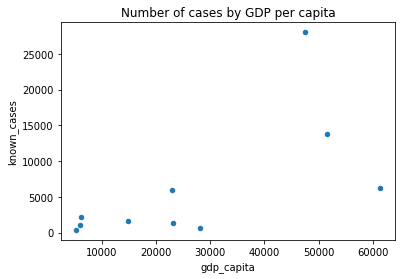

In [66]:
# scatter plot of number of known coronavirus cases by gdp per capita
europe.plot.scatter(x = 'gdp_capita', y = 'known_cases', title = 'Number of cases by GDP per capita')

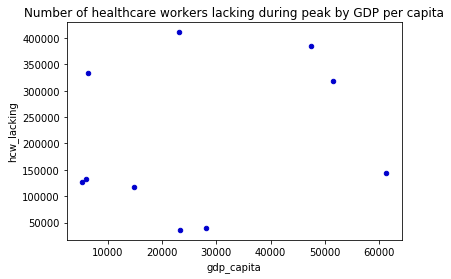

In [74]:
#scatter plot looking at the number of healthcare workers lacking by the country's gdp per capita
europe.plot.scatter(x = 'gdp_capita', y = 'hcw_lacking', title = 'Number of healthcare workers lacking during peak by GDP per capita', color = 'mediumblue')


In [85]:
#creates a chart comparing number of current known cases to forecasted cases
europe[['known_cases','forecasted_cases']]


,known_cases,forecasted_cases
country,,
albania,361,572969
austria,13806,1771729
belarus,2226,1888152
belgium,28018,2291216
bosniaherzegovina,1004,655769
croatia,1600,808952
cyprus,633,240969
czechrepublic,5952,2121329
denmark,6174,1163129


In [88]:
#creates a new column showing how many hospital beds a country will lack at the peak of their crisis, all else equal 
europe['beds_lacking'] = europe['critical_cases'] - europe['beds_peak']
europe['beds_lacking']

country
albania              20334
austria              21075
belarus              -9520
belgium              43025
bosniaherzegovina    21304
croatia              17757
cyprus                7944
czechrepublic        36964
denmark              43496
estonia               6543
Name: beds_lacking, dtype: int64

In [49]:
#from here on out, I was experimenting... wasn't working though
np.random.seed(200)
fig = plt.figure(figsize = (8, 8))
ax1 = fig.add_subplot(2,2,1)    
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.scatter(europe.'GDP per capita in USD', europe.'Known cumulative cases')
#ax3.scatter(wine.alcohol, wine.deaths_heart) 


SyntaxError: invalid syntax (<ipython-input-49-bbb6aca50ab7>, line 8)

<BarContainer object of 10 artists>

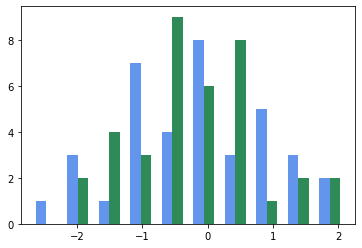

In [48]:
#see comment above... no idea what this is showing
np.random.seed(0)
df = pd.DataFrame(np.random.normal(size=(37,2)), columns=['GDP per capita in USD', 'Known cumulative cases'])
fig, ax = plt.subplots()

a_heights, a_bins = np.histogram(df['GDP per capita in USD'])
b_heights, b_bins = np.histogram(df['Known cumulative cases'], bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')